# Lecture 11: Scripts, modules, debugging
2019-07-02

Course material is available at http://unihb.eu/pdap2019

## References

- https://swcarpentry.github.io/python-novice-inflammation/10-cmdline/index.html
- https://docs.python-guide.org/writing/structure/#modules
- https://www.spyder-ide.org/
- https://realpython.com/python-debugging-pdb/
- [Debugging Python with ipdb and Sypder (YouTube)](https://www.youtube.com/watch?v=8SNaW1nt6j0)

## Re-using functions

Say you have a great analysis function like this:

In [4]:
def do_something(a, b, c):
    print("The second argument is", b)
    return a + b + c

In [5]:
do_something(1, 2, 3)

The second argument is 2


6

If you put this code (i.e., the function definition) into its own `.py` file, e.g., `mymodule.py`, you can *import* that file from e.g. a notebook and use the function like that:

In [6]:
import mymodule

In [7]:
mymodule.do_something_else(44, 55)

The first argument is 44


2420

In [8]:
mymodule.do_something_else(1, 2)

The first argument is 1


2

Now the problem is that whenever we change the `mymodule.py` file, these changes are not automatically reflected in the notebook:

In [9]:
import mymodule

In [10]:
mymodule.do_something_else(2, 3)

The first argument is 2


6

The `mymodule.do_something_else()` function is still the same as before we changed the definition in `mymodule.py`.

There are three ways to deal with this situation:

### Restart the Python kernel
You can restart the Python kernel from the *Kernel* menu, or using the *Restart the kernel* button from the toolbar.

Immediately after we do that, `mymodule` is not defined (as we didn't import it yet in the current session):

In [2]:
mymodule.do_something_else(2, 3)

NameError: name 'mymodule' is not defined

However, after importing the module again, the new code is applied:

In [3]:
import mymodule

In [4]:
mymodule.do_something_else(1, 2)

The first argument is really 1


2

### Reloading the imported module

Restarting the kernel might not always be desirable, e.g., if you have vaulable results in the current kernel which took a long time to compute.

In those situations, we can manually trigger a *reload* of the imported module, using the `importlib.reload()` function:

In [5]:
import importlib

In [6]:
mymodule.do_something_else(1, 2)

The first argument is really 1


2

Now, when we change the module file, we can reload it in the current kernel:

In [7]:
importlib.reload(mymodule)

<module 'mymodule' from '/home/hilboll/pdap2019/repo/lectures/mymodule.py'>

And the new code will be applied, without having to restart the kernel in between.

In [8]:
mymodule.do_something_else(2, 3)

The first argument is still 2


6

### Using `autoreload` magic

If manually triggering a reload is to cumbersome, you can use the `autoreload` extension to Jupyter:

In [8]:
%load_ext autoreload

You can look at the help by typing `%autoreload` and then hitting `SHIFT-TAB`

You will see that `%autoreload 2` is the most convenient to do:

In [10]:
%autoreload 2

In [11]:
mymodule.do_something_else(4, 5)

The first argument is still 4


20

Now, when we change our module file, the change will be applied immediately:

In [13]:
mymodule.do_something_else(4, 5)

The first argument is again (really) 4


42

In [14]:
mymodule.do_something_else(4, 5)

The first argument is again (really) 4


240

## Importing modules from an arbitrary location

Just calling `import mymodule` only works if the file `mymodule.py` is in the same directory as the script / notebook you're importing it from.

In [15]:
import module2

ModuleNotFoundError: No module named 'module2'

When running `import something`, Python goes through a list of directories, searching for the module `something`.  This list of directories is called `sys.path`:

In [16]:
import sys

In [17]:
sys.path

['/home/jupyterhub/conda/envs/prod/lib/python36.zip',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/lib-dynload',
 '',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/PyNIO',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/IPython/extensions',
 '/home/hilboll/.ipython']

In [18]:
type(sys.path)

list

As it's a regular Python `list`, you can modify it just like you can modify any list.  For example, in order to add the directory `/home/hilboll/pdap2019/repo/lectures/PDAP2019_Lecture-11/mycode/` to the beginning of the list, you can run the following command:

In [19]:
sys.path.insert(0, '/home/hilboll/mycode/')

Now, that directory where you put all your code is in `sys.path`:

In [20]:
sys.path

['/home/hilboll/mycode/',
 '/home/jupyterhub/conda/envs/prod/lib/python36.zip',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/lib-dynload',
 '',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/PyNIO',
 '/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/IPython/extensions',
 '/home/hilboll/.ipython']

And you can import the `mymodule2.py` from it:

In [21]:
import module2

In [22]:
module2.something_useful(3)

I'm not really useful


3

Since we already activated the `autoreload` extension above, changing the `mymodule2.py` will take immediate effect in this notebook:

In [23]:
module2.something_useful(3)

I'm really very useful :-)


3

## Running a Python script

Instead of using the notebook, you can write your Python code into a `.py` file and execute it.

You can either execute a script from the notebook (or any IPython interpreter) using the `%run` command:

In [24]:
%run myscript1.py

aa
and
246.9


If you want to have the functions defined in that script available, you can just import it using `import myscript1`.  

Alternatively, you can just run the command

    $ python myscript1.py
    
from the command line (or Anaconda prompt, ...).

However, this will run all the code in that file:

In [25]:
import myscript1

aa
and
246.9


In [26]:
myscript1.something_else('dd')

'dddd'

Now, this is not always what you want to do.  For example, if your script takes a long time to run, having all the code executed when you just want to `import` might be a stupid idea.

That's why in the script file, it is good practice to capture all the code that should run when you *execute* a script in a `main()` function (look at the file `myscript2.py`)

Now, when you import `myscript2`, the code is not run:

In [28]:
import myscript2

But when you execute the script, it *is* run:

__main__
aa
and
246.9


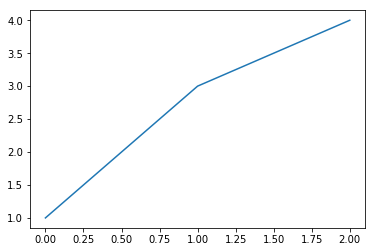

In [33]:
%run myscript2.py

## Hidden attributes in Python

Python denotes *hidden* attributes using double underscores (that's where the `if __name__ == '__main__'` comes from).  Some applications are to find out in which *file* something is defined, or the *version* of a module (if the module developers implemented this-:

In [29]:
import numpy as np

In [30]:
np.__file__

'/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/numpy/__init__.py'

In [31]:
np.__version__

'1.16.2'

## Debbugging

Using the *debugger* `pdb`, you can interactively inspect your code at arbitrary locations:

**NOTE:** Always exit the debugger using `continue` or `exit` commands before re-executing the cell, otherwise you're locking yourself out of the notebook (if that happens, only a *kernel restart* will remedy the situation).

In [34]:
import pdb

In [35]:
def myfunc1(a):
    b = a * 2
    pdb.set_trace()
    c = b * 2
    return c

In [36]:
myfunc1(3)

> <ipython-input-35-aa972d2eb02f>(4)myfunc1()
-> c = b * 2


(Pdb)  print(b)


6


(Pdb)  type(b)


<class 'int'>


(Pdb)  continue


12

In [ ]:
myfunc1(5)

In [1]:
%pdb

Automatic pdb calling has been turned ON


In [2]:
a = 2
b = 3.5
c = 'asdf'
b * c
print(a)

TypeError: can't multiply sequence by non-int of type 'float'

> <ipython-input-2-c1c0661f6726>(4)<module>()
      1 a = 2
      2 b = 3.5
      3 c = 'asdf'
----> 4 b * c
      5 print(a)



ipdb>  exit


In [3]:
def some_other_func(a):
    print(a * 'asdf')

In [4]:
some_other_func(4)

asdfasdfasdfasdf


In [5]:
some_other_func(4.5)

TypeError: can't multiply sequence by non-int of type 'float'

> <ipython-input-3-8573c475bfea>(2)some_other_func()
      1 def some_other_func(a):
----> 2     print(a * 'asdf')



ipdb>  exit


In [6]:
def next_func(a, b):
    c = a + b
    some_other_func(c)

In [7]:
next_func(1, 1)

asdfasdf


In [8]:
next_func(1.5, 1)

TypeError: can't multiply sequence by non-int of type 'float'

> <ipython-input-3-8573c475bfea>(2)some_other_func()
      1 def some_other_func(a):
----> 2     print(a * 'asdf')



ipdb>  up


> <ipython-input-6-4961a5d78492>(3)next_func()
      1 def next_func(a, b):
      2     c = a + b
----> 3     some_other_func(c)



ipdb>  print(a)


1.5


ipdb>  print(b)


1


ipdb>  down


> <ipython-input-3-8573c475bfea>(2)some_other_func()
      1 def some_other_func(a):
----> 2     print(a * 'asdf')



ipdb>  print(a)


2.5


ipdb>  upd


*** NameError: name 'upd' is not defined


ipdb>  up


> <ipython-input-6-4961a5d78492>(3)next_func()
      1 def next_func(a, b):
      2     c = a + b
----> 3     some_other_func(c)



ipdb>  print(a, b)


1.5 1


ipdb>  u


> <ipython-input-8-d5b157ce36a7>(1)<module>()
----> 1 next_func(1.5, 1)



ipdb>  d


> <ipython-input-6-4961a5d78492>(3)next_func()
      1 def next_func(a, b):
      2     c = a + b
----> 3     some_other_func(c)



ipdb>  d


> <ipython-input-3-8573c475bfea>(2)some_other_func()
      1 def some_other_func(a):
----> 2     print(a * 'asdf')



ipdb>  c


### Reminder: You can easily overwrite imported modules

In [1]:
import pandas as pd

In [2]:
pd.read_csv()

TypeError: parser_f() missing 1 required positional argument: 'filepath_or_buffer'

In [3]:
pd = 2

Now, `pd` is not the Pandas module any more, but the number `2`:

In [4]:
pd.read_csv()

AttributeError: 'int' object has no attribute 'read_csv'